In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import string
import nrrd
import nibabel as nib

In [3]:
import cactas as C

2023-01-28 23:10:26.143204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-28 23:10:26.221788: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-28 23:10:26.221800: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-28 23:10:26.666228: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [4]:
ESUSDIR = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/'
AFIBDIR = ''

DATADIR = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Nathan'
SLICER = DATADIR + '/' + '3D slicer set/'
CACTAS = DATADIR + '/' + 'CACTAS set/'

JAEDIR = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/'

In [5]:
datakey = '''T0 ESUS 12 (DEMO)
T1 ESUS 87
T2 AFIB ANONU8N44F1Q3
01 ESUS 17
02 AFIB ANON6GJ34F10E
03 ESUS 71
04 AFIB ANON8RJ34F1SM
05 ESUS 40
06 AFIB ANON65K34F117
07 ESUS 13
08 AFIB ANONFPK34F109
09 ESUS 25
10 AFIB ANONRAEO9F14J'''

In [6]:
# THIS LOADS NATHAN's GROUNDTRUTH
#
groundtruths = {}
for d in datakey.split('\n'):
    d_s = d.split(' ')
    d_id = d_s[0]
    d_type = d_s[1]
    d_label = d_s[2]
    
    gt_file = None
    if (d_type == 'ESUS'):
        
        gt_dir = ESUSDIR+'DICOM '+d_label+'/'
        image, segmentation = C.Util.parse_folder(gt_dir)
        
        gt_file = gt_dir + segmentation
    
    groundtruths[d_id] = gt_file

In [7]:
groundtruths

{'T0': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 12/ESUS12_Segmentation.seg.nrrd',
 'T1': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 87/Segmentation.seg.nrrd',
 'T2': None,
 '01': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 17/Segmentation.seg.nrrd',
 '02': None,
 '03': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 71/Segmentation.seg.nrrd',
 '04': None,
 '05': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 40/Segmentation.seg.nrrd',
 '06': None,
 '07': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 13/Segmentation.seg.nrrd',
 '08': None,
 '09': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/DICOM 25/Segmentation.seg.nrrd',
 '10': None}

In [8]:
# JAE'S groundtruth

In [9]:
jae_groundtruths = {}

for d in datakey.split('\n'):
    d_s = d.split(' ')
    d_id = d_s[0]
    d_type = d_s[1]
    d_label = d_s[2]
    
    gt_file = None
    if (d_type == 'ESUS'):
        
        gt_dir = JAEDIR#ESUSDIR+'DICOM '+d_label+'/'
#         image, segmentation = C.Util.parse_folder(gt_dir)
        
        gt_file = gt_dir + d_label + '.nrrd'
    
    jae_groundtruths[d_id] = gt_file

In [10]:
jae_groundtruths

{'T0': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/12.nrrd',
 'T1': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/87.nrrd',
 'T2': None,
 '01': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/17.nrrd',
 '02': None,
 '03': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/71.nrrd',
 '04': None,
 '05': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/40.nrrd',
 '06': None,
 '07': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/13.nrrd',
 '08': None,
 '09': '/home/d/Dropbox/RESEARCH/CAROTID/DATA/CACTAS_Study_Jae/25.nrrd',
 '10': None}

In [11]:
os.listdir(SLICER), os.listdir(CACTAS)

(['08 (282 s)',
  '05 (219 s)',
  'T2 (4m 25s)',
  '09 (763 s)',
  'T0 (440 s)',
  '02 (268 s)',
  '04 (423 s)',
  '01 (1180 s)',
  '06 (78 s, no calcs)',
  'T1 (7m 43s)',
  '10 (40 s, no calcs)',
  '07 (440 s)',
  '03 (554 s)'],
 ['02 (195s)',
  '10 (79s, no calcs)',
  'T2 (2m 42s)',
  '09 (343s)',
  'T1 (4m 27s)',
  '05 (431s)',
  '03 (196s)',
  '08 (271s)',
  '06 (57s, no calcs)',
  '07 (370s)',
  '04 (369s)',
  '01 (543s)'])

In [12]:
TIMINGS = {}
TIMINGS['SLICER'] = {}
TIMINGS['CACTAS'] = {}

JACCARD = {}
JACCARD['SLICER'] = {}
JACCARD['CACTAS'] = {}

JACCARD_JAE = {}
JACCARD_JAE['SLICER'] = {}
JACCARD_JAE['CACTAS'] = {}

JACCARD_JAE2D = {}
JACCARD_JAE2D['SLICER'] = {}
JACCARD_JAE2D['CACTAS'] = {}

DICE = {}

for tool in ['SLICER', 'CACTAS']:
    
    tool_data = os.listdir(eval(tool))
    
    for s in sorted(tool_data):
        
        seg_folder = eval(tool) + '/' + s

        s_s = s.split(' ')
        task = s_s[0]
        time = 0
        
#         print(s_s[1])
#         break

        if s_s[1].find('m') != -1:
            # m s notation
            minu = int(s_s[1].strip(string.ascii_lowercase).strip(string.punctuation))
            secs = int(s_s[2].strip(string.ascii_lowercase).strip(string.punctuation).strip('s'))
            
            time = minu*60 + secs

        else:
            #
            secss = s_s[1].replace('s','')
            secs = int(secss.strip(string.ascii_lowercase).strip(string.punctuation))

#             print('other', secs)
            time = secs
            
#         print(task, time)
#         continue

        TIMINGS[tool][task] = time
        
        # jaccard
        if groundtruths[task]:
            
            gt = nrrd.read(groundtruths[task])[0]
            
            seg_file = [f for f in os.listdir(seg_folder) if not f.startswith('.')]
            seg_file = seg_folder + '/' + seg_file[0]
            
            if seg_file.endswith('nii.gz'):
                seg = nib.load(seg_file).get_fdata()
            elif (seg_file.endswith('nrrd')):
                seg = nrrd.read(seg_file)[0]
            else:
                print('wrong format', seg_file)
                
            jac = C.Util.jaccard(C.Util.binarize(gt), C.Util.binarize(seg))
            
            JACCARD[tool][task] = jac
            
        if jae_groundtruths[task]:
            
            gt = nrrd.read(jae_groundtruths[task])[0]
            
            seg_file = [f for f in os.listdir(seg_folder) if not f.startswith('.')]
            seg_file = seg_folder + '/' + seg_file[0]
            
            if seg_file.endswith('nii.gz'):
                seg = nib.load(seg_file).get_fdata()
            elif (seg_file.endswith('nrrd')):
                seg = nrrd.read(seg_file)[0]
            else:
                print('wrong format', seg_file)
                
            jac2d = []
            for z in range(gt.shape[2]):
                jac2d.append(C.Util.jaccard(C.Util.binarize(gt[:,:,z]), C.Util.binarize(seg[:,:,z])))
                
                
            jac = C.Util.jaccard(C.Util.binarize(gt), C.Util.binarize(seg))
            
            JACCARD_JAE[tool][task] = jac
            JACCARD_JAE2D[tool][task] = jac2d
            print(tool, task, '2d', np.mean(jac2d), np.std(jac2d))

SLICER 01 2d 0.9647482996457473 0.14382825208905078
SLICER 03 2d 2.7996731924055358e-05 0.00012842097761577218
SLICER 05 2d 0.9890982303612973 0.07471403212281952
SLICER 07 2d 0.9350794643297469 0.20049704360178544
SLICER 09 2d 0.9642755442738474 0.14062033208820626
SLICER T0 2d 0.9756743407590828 0.12107943915230186
SLICER T1 2d 0.9836954200304142 0.08848076020653668
CACTAS 01 2d 0.9544131345375969 0.18279402275554843
CACTAS 03 2d 0.9537303882213704 0.1867377103213825
CACTAS 05 2d 0.9859050585637273 0.09956740888935603
CACTAS 07 2d 0.9317516240706811 0.21200115314846613
CACTAS 09 2d 0.9597776455848102 0.14948180066359676
CACTAS T1 2d 0.9760630314680443 0.12348935649102975


In [13]:
TIMINGS

{'SLICER': {'01': 1180,
  '02': 268,
  '03': 554,
  '04': 423,
  '05': 219,
  '06': 78,
  '07': 440,
  '08': 282,
  '09': 763,
  '10': 40,
  'T0': 440,
  'T1': 463,
  'T2': 265},
 'CACTAS': {'01': 543,
  '02': 195,
  '03': 196,
  '04': 369,
  '05': 431,
  '06': 57,
  '07': 370,
  '08': 271,
  '09': 343,
  '10': 79,
  'T1': 267,
  'T2': 162}}

In [14]:
JACCARD

{'SLICER': {'01': 0.489010989010989,
  '03': 2.3526807460350646e-05,
  '05': 0.5045454545454545,
  '07': 0.4861111111111111,
  '09': 0.6215870307167235,
  'T0': 0.5337837837837838,
  'T1': 0.7068965517241379},
 'CACTAS': {'01': 0.4173027989821883,
  '03': 0.2953929539295393,
  '05': 0.48125,
  '07': 0.4362745098039216,
  '09': 0.4469111969111969,
  'T1': 0.587378640776699}}

In [15]:
JACCARD_JAE

{'SLICER': {'01': 0.5786713286713286,
  '03': 2.038544396422428e-05,
  '05': 0.5373831775700935,
  '07': 0.5264394829612221,
  '09': 0.67756381549485,
  'T0': 0.5867768595041323,
  'T1': 0.6870229007633588},
 'CACTAS': {'01': 0.41575492341356673,
  '03': 0.346875,
  '05': 0.40718562874251496,
  '07': 0.42592592592592593,
  '09': 0.4863636363636364,
  'T1': 0.5224489795918368}}

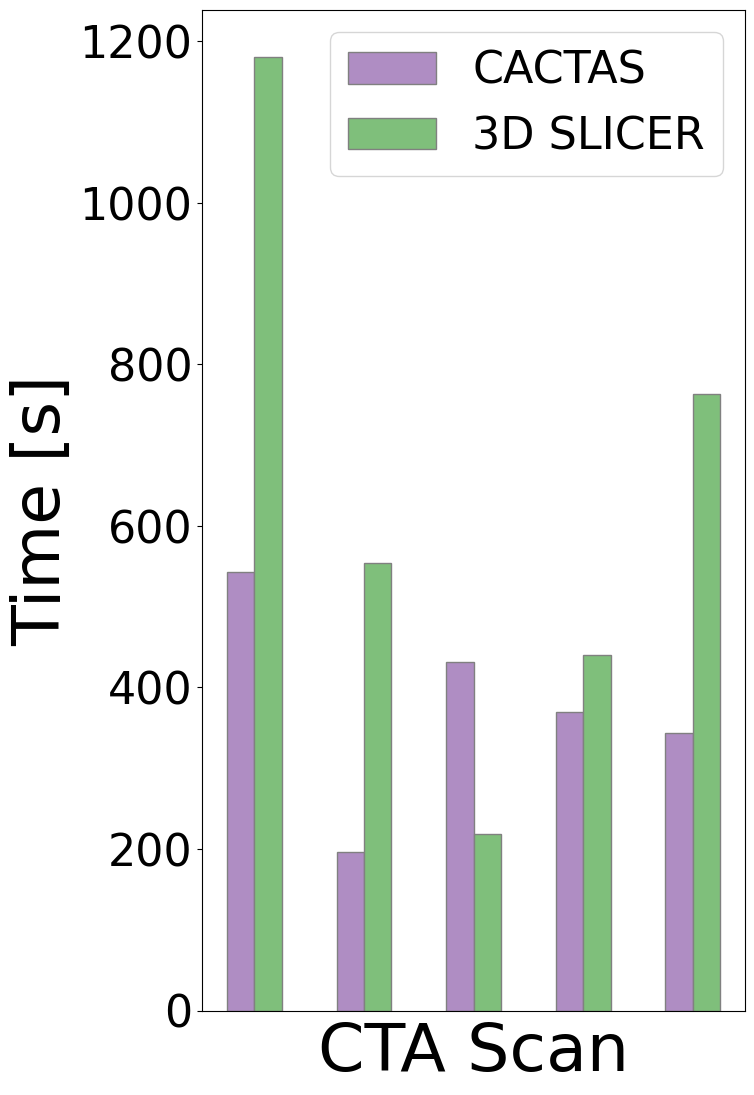

In [173]:
matplotlib.rcParams.update({'font.size': 32})
plt.rc('axes', labelsize=48)    # fontsize of the x and y labels
plt.rc('legend', fontsize=32)   


# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(7, 13))
 
# set height of bar
IT = ([TIMINGS['SLICER'][v] for v in TIMINGS['SLICER'].keys() if v in ['01', '03', '05', '07', '09']])
ECE =  ([TIMINGS['CACTAS'][v] for v in TIMINGS['CACTAS'].keys() if v in ['01', '03', '05', '07', '09']])


# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
 
# Make the plot
colors = ['#af8dc3', '#7fbf7b']

plt.bar(br1, ECE, color =colors[0], width = barWidth,
        edgecolor ='grey', label ='CACTAS')
plt.bar(br2, IT, color =colors[1], width = barWidth,
        edgecolor ='grey', label ='3D SLICER')
# Adding Xticks
plt.xlabel('CTA Scan')#, fontweight ='bold', fontsize = 15)
plt.ylabel('Time [s]')#', fontweight ='bold', fontsize = 15)
# plt.xticks([r + barWidth for r in range(len(IT))],
#         sorted([TIMINGS['SLICER'].keys()]))
# plt.xticks(range(0,5))
# plt.xlabel(['CTA1'])
plt.xticks([]) 

plt.legend()


outputdir='/home/d/Dropbox/RESEARCH/CAROTID/PLOTS/'
titleb='cactas_timings'
filename_pdf = outputdir+'/'+titleb.replace(' ','_')+'.pdf'
filename_png = outputdir+'/'+titleb.replace(' ','_')+'.png'
plt.savefig(filename_pdf,bbox_inches='tight')
plt.savefig(filename_png,bbox_inches='tight')

plt.show()

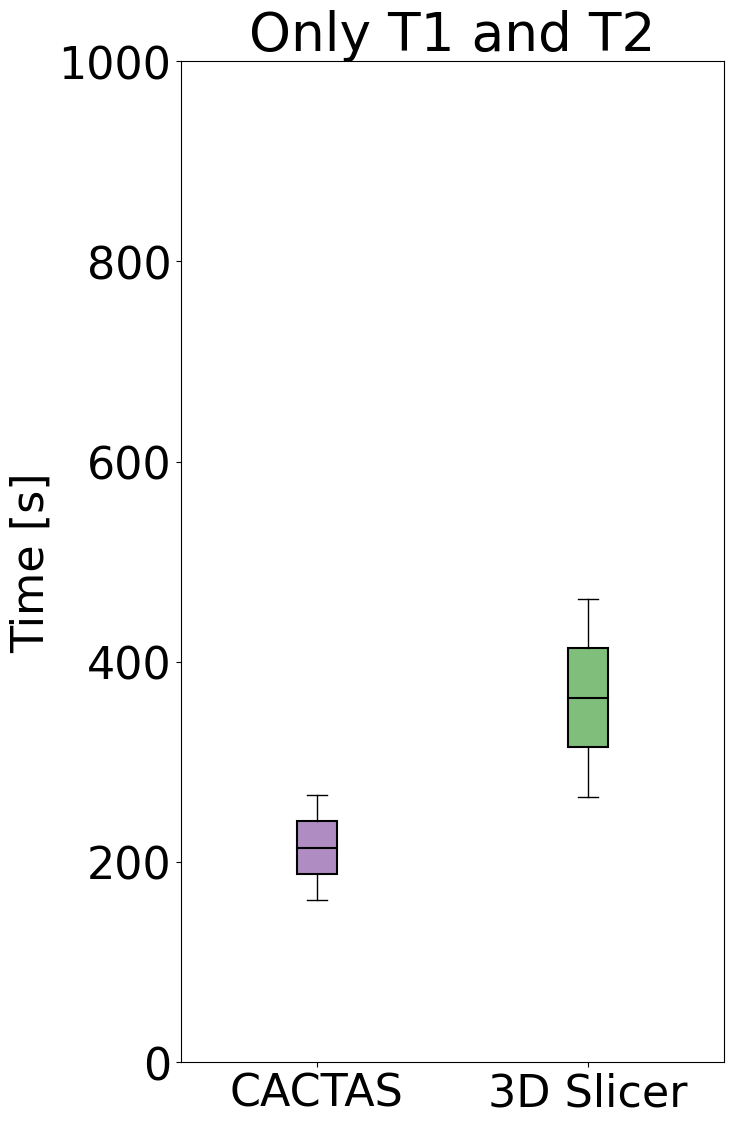

CACTAS 214.5 +/- 52.5
3D Slicer 364.0 +/- 99.0
t_4 = -1.334 ,p= 0.31


In [168]:
slicer_times = [TIMINGS['SLICER']['T1'], TIMINGS['SLICER']['T2']]
cactas_times = [TIMINGS['CACTAS']['T1'], TIMINGS['CACTAS']['T2']]

all_data = [cactas_times, slicer_times]
labels = ['CACTAS', '3D Slicer']


C.Util.boxplot(all_data, labels, title='Only T1 and T2')

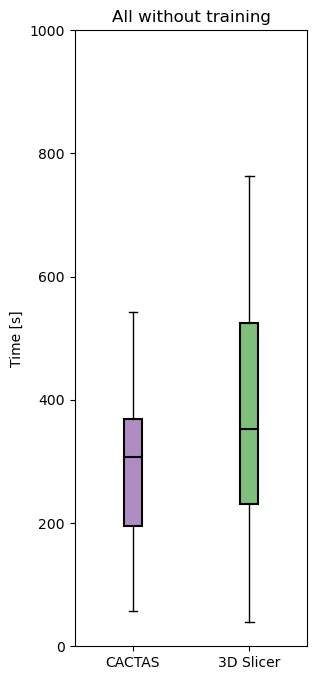

CACTAS 285.4 +/- 147.02394362824037
3D Slicer 424.7 +/- 325.16243632990574
t_20 = -1.171 ,p= 0.26


In [120]:
slicer_times = [TIMINGS['SLICER'][v] for v in TIMINGS['SLICER'] if TIMINGS['SLICER'][v] > 0 and not v.startswith('T')]
cactas_times = [TIMINGS['CACTAS'][v] for v in TIMINGS['CACTAS'] if TIMINGS['CACTAS'][v] > 0 and not v.startswith('T')]

all_data = [cactas_times, slicer_times]
labels = ['CACTAS', '3D Slicer']


C.Util.boxplot(all_data, labels, title='All without training')

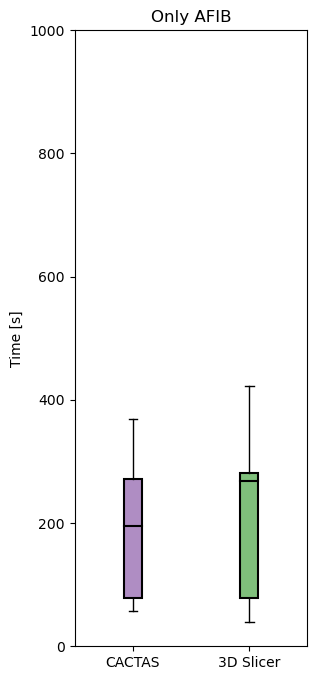

CACTAS 194.2 +/- 117.08868433798375
3D Slicer 218.2 +/- 141.35402364276723
t_10 = -0.262 ,p= 0.8


In [119]:
slicer_times = [TIMINGS['SLICER'][v] for v in ['02', '04', '06', '08', '10' ]]
cactas_times = [TIMINGS['CACTAS'][v] for v in ['02', '04', '06', '08', '10' ]]

all_data = [cactas_times, slicer_times]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, title='Only AFIB')

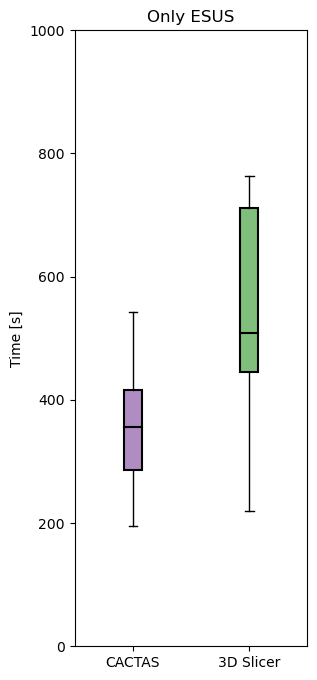

CACTAS 358.3333333333333 +/- 111.39070378128011
3D Slicer 603.1666666666666 +/- 304.01612713070926
t_12 = -1.691 ,p= 0.12


In [111]:
slicer_times = [TIMINGS['SLICER'][v] for v in ['01', '03', '05', '07', '09', 'T1' ]]
cactas_times = [TIMINGS['CACTAS'][v] for v in ['01', '03', '05', '07', '09', 'T1' ]]

all_data = [cactas_times, slicer_times]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, title='Only ESUS')

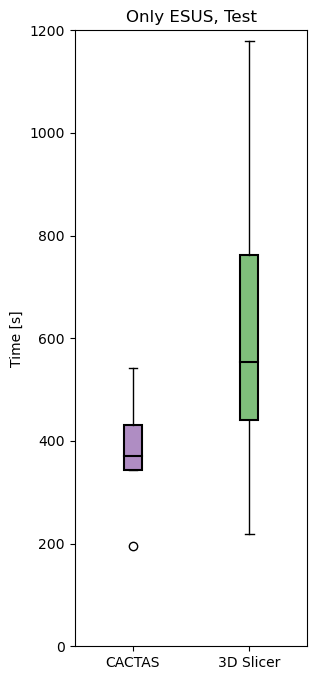

CACTAS 376.6 +/- 113.5228611337822
3D Slicer 631.2 +/- 325.87690927710725
t_10 = -1.476 ,p= 0.18


In [137]:
slicer_times = [TIMINGS['SLICER'][v] for v in ['01', '03', '05', '07', '09' ]]
cactas_times = [TIMINGS['CACTAS'][v] for v in ['01', '03', '05', '07', '09' ]]

all_data = [cactas_times, slicer_times]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, title='Only ESUS, Test', y_lim=1200)

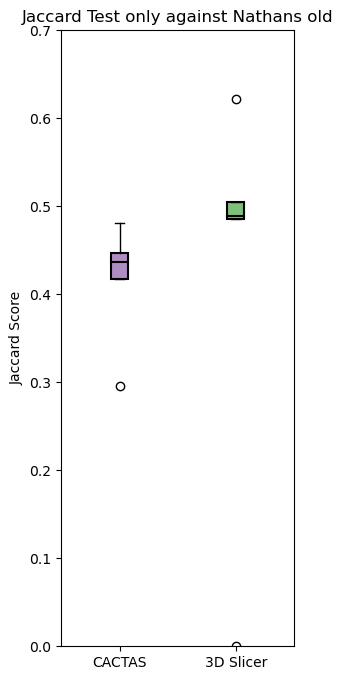

CACTAS 0.4154262919253692 +/- 0.06351414249523935
3D Slicer 0.4202556224383477 +/- 0.21600850528402452
t_10 = -0.043 ,p= 0.97


In [114]:
slicer_times = [JACCARD['SLICER'][v] for v in JACCARD['SLICER'] if not v.startswith('T')]
cactas_times = [JACCARD['CACTAS'][v] for v in JACCARD['CACTAS'] if not v.startswith('T')]

all_data = [cactas_times, slicer_times]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, y_lim=0.7, y_label='Jaccard Score', title='Jaccard Test only against Nathans old')

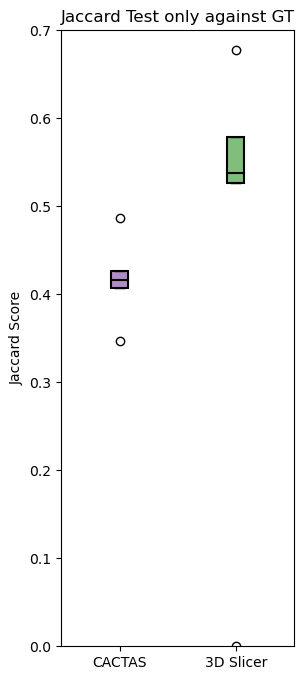

CACTAS 0.4164210228891288 +/- 0.04450774731354793
3D Slicer 0.46401563802829165 +/- 0.23804196192753188
t_10 = -0.393 ,p= 0.7


In [115]:
slicer_times = [JACCARD_JAE['SLICER'][v] for v in JACCARD_JAE['SLICER'] if not v.startswith('T')]
cactas_times = [JACCARD_JAE['CACTAS'][v] for v in JACCARD_JAE['CACTAS'] if not v.startswith('T')]

all_data = [cactas_times, slicer_times]#[np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, y_lim=0.7, y_label='Jaccard Score', title='Jaccard Test only against GT')

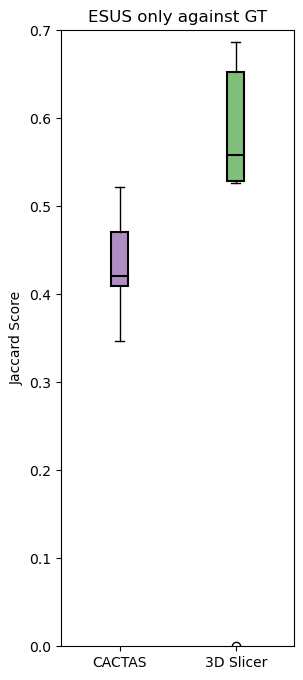

CACTAS 0.43409234900624677 +/- 0.05667593677620051
3D Slicer 0.5011835151508028 +/- 0.23265260614822458
t_12 = -0.627 ,p= 0.55


In [116]:
slicer_times = [JACCARD_JAE['SLICER'][v] for v in ['01', '03', '05', '07', '09', 'T1' ]]
cactas_times = [JACCARD_JAE['CACTAS'][v] for v in ['01', '03', '05', '07', '09', 'T1' ]]

all_data = [cactas_times, slicer_times]#[np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, y_lim=0.7, y_label='Jaccard Score', title='ESUS only against GT')

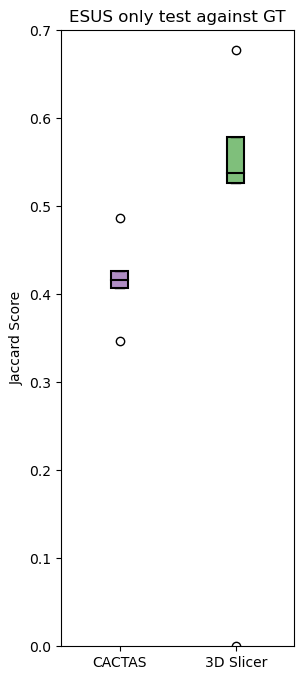

CACTAS 0.4164210228891288 +/- 0.04450774731354793
3D Slicer 0.46401563802829165 +/- 0.23804196192753188
t_10 = -0.393 ,p= 0.7


In [136]:
slicer_times = [JACCARD_JAE['SLICER'][v] for v in ['01', '03', '05', '07', '09' ]]
cactas_times = [JACCARD_JAE['CACTAS'][v] for v in ['01', '03', '05', '07', '09' ]]

all_data = [cactas_times, slicer_times]#[np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, y_lim=0.7, y_label='Jaccard Score', title='ESUS only test against GT')

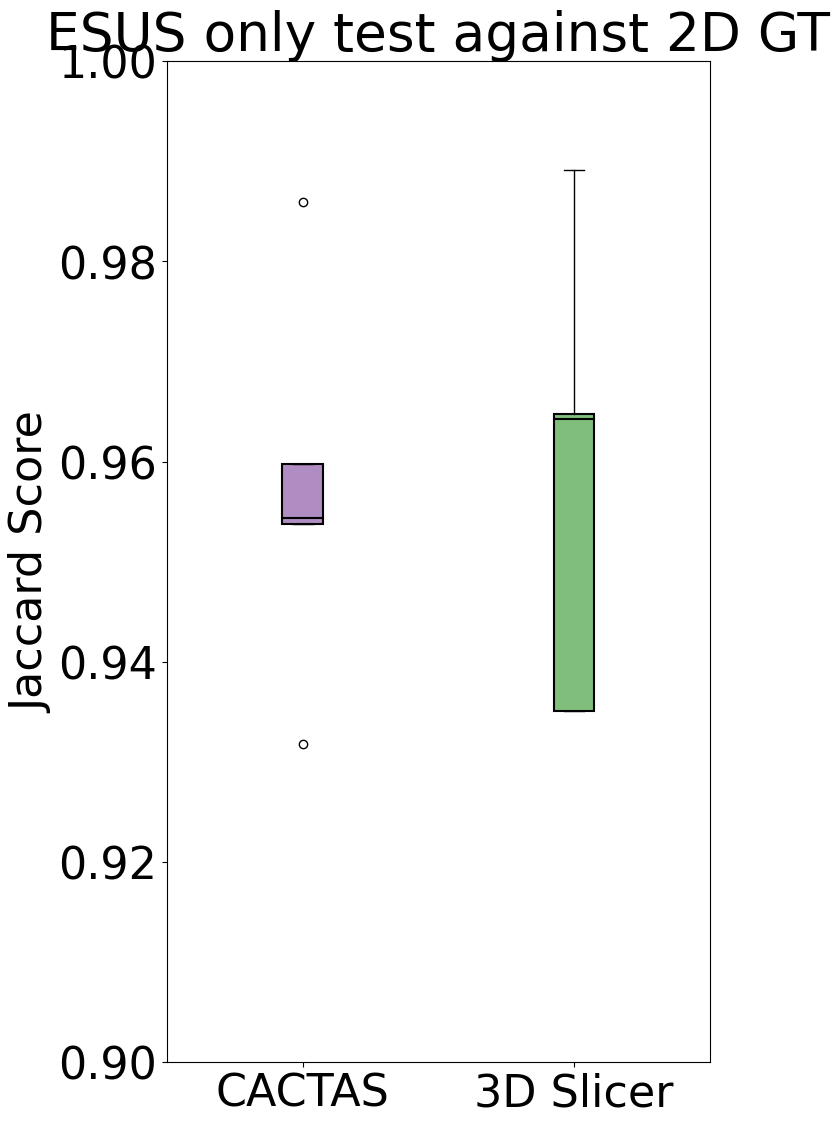

CACTAS 0.9571155701956371 +/- 0.01730903616258549
3D Slicer 0.7706459070685127 +/- 0.38568898123892675
t_10 = 0.966 ,p= 0.36


In [169]:
slicer_times = [np.mean(JACCARD_JAE2D['SLICER'][v]) for v in ['01', '03', '05', '07', '09' ]]
cactas_times = [np.mean(JACCARD_JAE2D['CACTAS'][v]) for v in ['01', '03', '05', '07', '09' ]]

all_data = [cactas_times, slicer_times]#[np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['CACTAS', '3D Slicer']

C.Util.boxplot(all_data, labels, y_lim_min=0.9, y_lim=1, y_label='Jaccard Score', title='ESUS only test against 2D GT')